<a href="https://colab.research.google.com/github/Raul803/integral/blob/main/Raul_Colombia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
# This statement allow to display plot without asking to 
%matplotlib inline
 # always make it pretty 
plt.style.use('ggplot')
!pip install sktime

     |████████████████████████████████| 5.6MB 5.8MB/s 
     |████████████████████████████████| 9.5MB 36.6MB/s 
     |████████████████████████████████| 6.8MB 43.9MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
head = ['Fecha_reporte','ID_caso', 'Fecha_notificacion', 'Codigo_DIVIPOLA_departamento', 'Nombre_departamento', 'Codigo_DIVIPOLA_municipio','Nombre_municipio', 'Edad', 'Unidad_medida_edad' ,	'Sexo', 'Tipo_contagio', 'Ubicacion', 'Estado',   'Codigo_ISO_pai­s', 'Nombre_pais','Recuperado', 'Fecha_si­ntomas','Fecha_muerte','Fecha_diagnostico', 'Fecha_recuperacion', 'Tipo_recuperacion', 'Pertenencia_Ectnica', 	'Nombre_grupo_Ectnico']
df = pd.read_csv('drive/My Drive/DataBase/Colombia.csv',sep=',',encoding='ISO-8859-1',header=0,names=head)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fecha_reporte,ID_caso,Fecha_notificacion,Codigo_DIVIPOLA_departamento,Nombre_departamento,Codigo_DIVIPOLA_municipio,Nombre_municipio,Edad,Unidad_medida_edad,Sexo,Tipo_contagio,Ubicacion,Estado,Codigo_ISO_pai­s,Nombre_pais,Recuperado,Fecha_si­ntomas,Fecha_muerte,Fecha_diagnostico,Fecha_recuperacion,Tipo_recuperacion,Pertenencia_Ectnica,Nombre_grupo_Ectnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÃA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÃA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


Graficas de pacientes por dia:

In [ ]:
data = pd.DataFrame(columns=['Fecha','NoPasc']) #,
data.Fecha = df.Fecha_diagnostico.T
data.NoPasc = 1
d=data.groupby('Fecha').count()
d=d.sort_values('Fecha')

<BarContainer object of 261 artists>

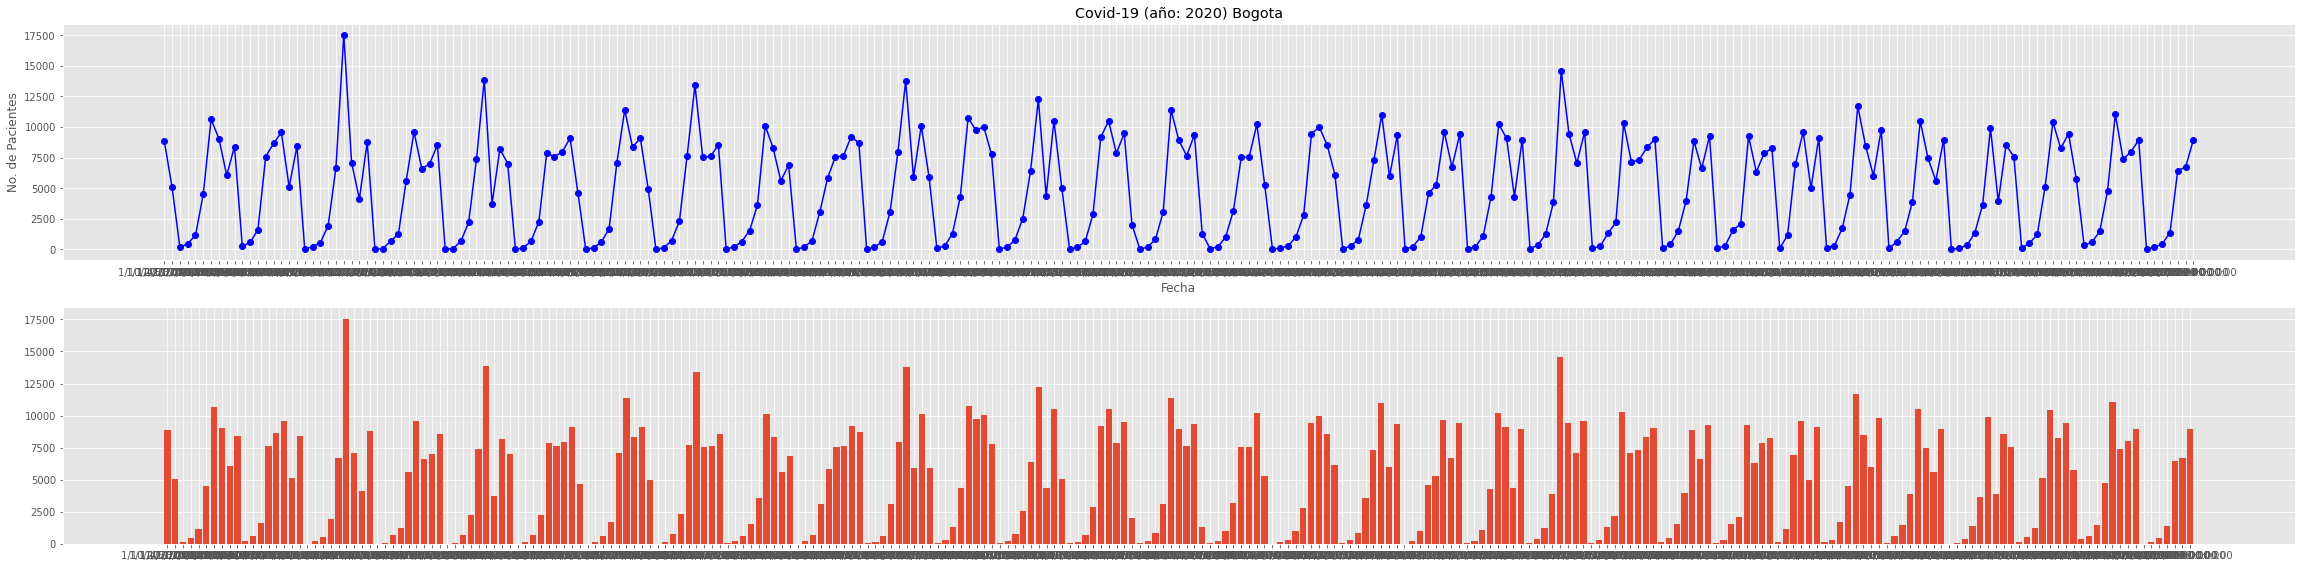

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(40,20))
fig.tight_layout()
plt.xticks(range(int(len(d.NoPasc)/100)))
ax = plt.subplot(4,1,1)
plt.plot(d.index,d.NoPasc,'bo-') # Lineas
ax.set_title('Covid-19 (año: 2020) Colombia')
ax.set_xlabel('Fecha')
ax.set_ylabel('No. de Pacientes')
ax = plt.subplot(4,1,2)
plt.bar(d.index,d.NoPasc)

Agrupar por Mes para Graficar.


In [ ]:
# Agrupando por Mes
data = pd.DataFrame([df.Fecha_diagnostico]).T
data['Fecha_diagnostico'] = pd.to_datetime(data['Fecha_diagnostico'])
data['NoPac']=1
data.set_index('Fecha_diagnostico', inplace=True)
Data = data.copy() # Cramos una copia para el siguiente paso
data = data.resample('M').sum()

**Graficas: Por Mes**

Se muestran los casos positivos por cada mes desde el inicio de la pandemia

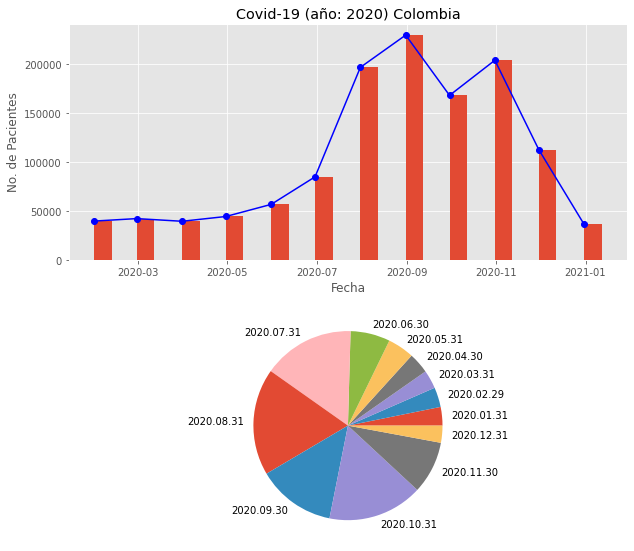

In [ ]:
fig = plt.figure(figsize=(10,20))
fig.tight_layout()
plt.xticks(range(int(len(data.NoPac)/2)))
ax = plt.subplot(4,1,1)

plt.bar(data.index.values,data['NoPac'],align="edge", width = 12.0, linewidth = 100.0 )
plt.plot(data.index,data['NoPac'],'bo-') # Lineas
ax.set_title('Covid-19 (año: 2020) Colombia')
ax.set_xlabel('Fecha')
ax.set_ylabel('No. de Pacientes')
ax = plt.subplot(4,1,2)
a = plt.pie(data.NoPac,labels=[pd.to_datetime(x).strftime('%Y.%m.%d') for x in data.index])

# **Creando un Modelo:**

Vamos a generar un modelo en base a la serie de tiempo.

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf53dcae10>)

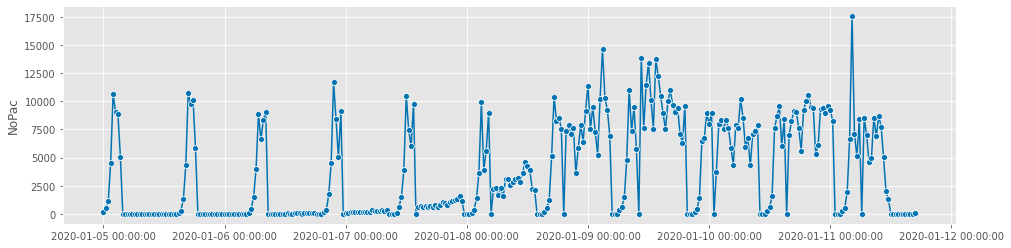

In [ ]:
from sktime.utils.plotting import plot_series
# Creamos la serie de Tiempo. Basada en los dias desde el incio de la pandemia.
index = pd.date_range('2020-01-04', periods=336, freq='D')
data = Data.copy()
data = data.resample('D').sum()
series = pd.Series(data.NoPac, index=index)
plot_series(series) # Gráfica de la serie de tiempo creada

Una buena estrategia para separa la data para ***entrenamiento*** y ***testeo***.

276 60


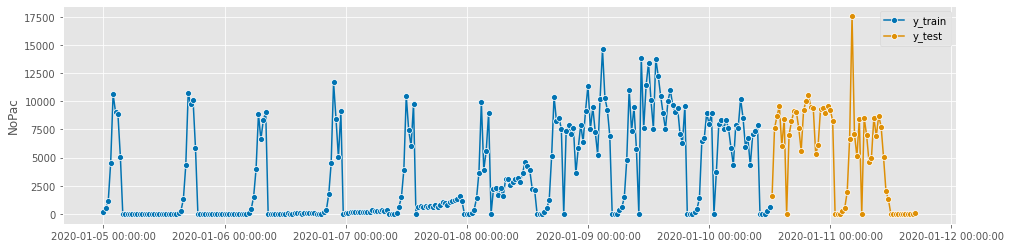

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(series, test_size=60)
plot_series(y_train, y_test, labels=["y_train", "y_test"]);
print(y_train.shape[0], y_test.shape[0])

In [ ]:
Ahora, vamos a crear nuestro horizonte, y probar nuestro modelo.


SMAPE en TEST = 1.6927224123948894


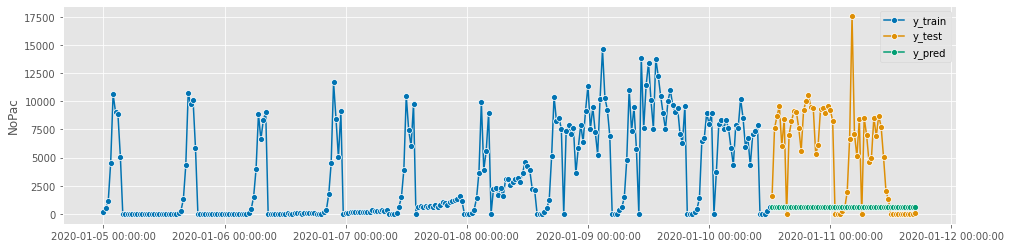

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import smape_loss
from sktime.forecasting.base import ForecastingHorizon
horizonte_absoluto = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(horizonte_absoluto)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
print('SMAPE en TEST =', smape_loss(y_pred, y_test))

Aun mejor:

SMAPE en TEST = 0.7960020502657643


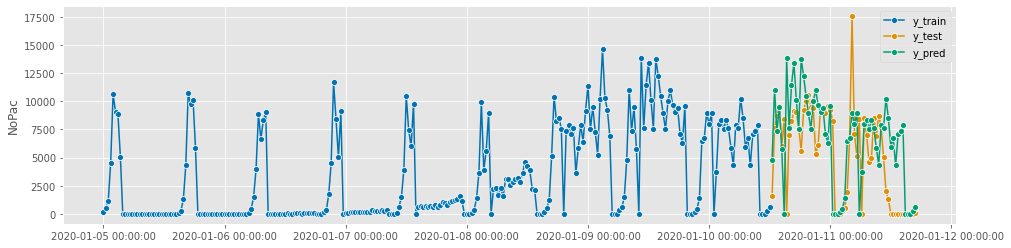

In [ ]:
forecaster = NaiveForecaster(strategy="last", sp=60)
forecaster.fit(y_train)
y_pred = forecaster.predict(horizonte_absoluto)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
print('SMAPE en TEST =', smape_loss(y_pred, y_test))

# **Que pasará el próximo año:**

Vamos a predecir que ocurriria en los primeros dos meses del proximo año, según nuestro modelo.

In [ ]:
index = pd.date_range('2021-01-01', periods=60, freq='D')
series = pd.Series(1, index=index)
horizonte_2021 = ForecastingHorizon(series.index, is_relative=False)
print(horizonte_2021)

ForecastingHorizon(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
 

2021-01-01       2
2021-01-02     172
2021-01-03     445
2021-01-04    1375
2021-01-05    6442
2021-01-06    6722
2021-01-07    8948
2021-01-08    7985
2021-01-09    8942
2021-01-10       0
dtype: int64


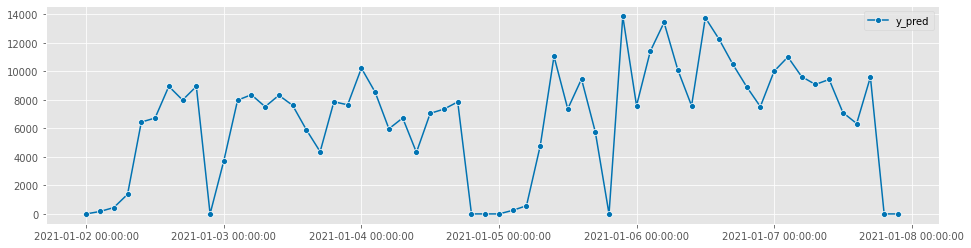

In [ ]:
y_pred = forecaster.predict(horizonte_2021)
plot_series(y_pred,labels=["y_pred"]);
print(y_pred.head(10))